In [69]:
# Lab 2 (Part A)
# [1] First, you need to perform all the data preprocessing parts. 
# Then, you need to select one feature that has a linear relationship 
# with your target variable. Please discuss or show your work why 
# you have selected this particular feature to build your simple linear regression model.
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

# Import your dataset using pandas and Create a dataframe
dataset = pd.read_csv('housing.data2.csv', header = None, sep = '\s+')

In [70]:
# Convert your dataset to csv file
# Then use the print() function to generate output
print(dataset)
X = dataset.iloc[:,:].values

          0     1      2   3      4      5     6       7   8      9     10  \
0    0.00632  18.0   2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1    0.02731   0.0   7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2    0.02729   0.0   7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3    0.03237   0.0   2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4    0.06905   0.0   2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   
..       ...   ...    ...  ..    ...    ...   ...     ...  ..    ...   ...   
501  0.06263   0.0  11.93   0  0.573  6.593  69.1  2.4786   1  273.0  21.0   
502  0.04527   0.0  11.93   0  0.573  6.120  76.7  2.2875   1  273.0  21.0   
503  0.06076   0.0  11.93   0  0.573  6.976  91.0  2.1675   1  273.0  21.0   
504  0.10959   0.0  11.93   0  0.573  6.794  89.3  2.3889   1  273.0  21.0   
505  0.04741   0.0  11.93   0  0.573  6.030  80.8  2.5050   1  273.0  21.0   

         11    12    13  
0    396.90  4.98  24.0  
1    396.90

In [71]:
# how you can find about if there is NaN in your dataset. I used a variable named check_nan 
# to store myresult. If you print the variable, then you should get a True as result. 
# That means you have NaN in yourdataset.
check_nan = dataset.isnull().values.any()
print(check_nan)

False


In [72]:
# As you notice, the dataset does not have any column names. 
# Assign the column names (you can find out the column names from 
# below description of dataset) to get a clear idea about the features.
dataset.columns=('CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV')
# Use head() function
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [73]:
import pandas as pd
from pandas.plotting import scatter_matrix
%matplotlib inline

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


array([[<AxesSubplot:xlabel='CRIM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='ZN', ylabel='CRIM'>,
        <AxesSubplot:xlabel='INDUS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='CHAS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='NOX', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RM', ylabel='CRIM'>,
        <AxesSubplot:xlabel='AGE', ylabel='CRIM'>,
        <AxesSubplot:xlabel='DIS', ylabel='CRIM'>,
        <AxesSubplot:xlabel='RAD', ylabel='CRIM'>,
        <AxesSubplot:xlabel='TAX', ylabel='CRIM'>,
        <AxesSubplot:xlabel='PTRATIO', ylabel='CRIM'>,
        <AxesSubplot:xlabel='B', ylabel='CRIM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='CRIM'>,
        <AxesSubplot:xlabel='MEDV', ylabel='CRIM'>],
       [<AxesSubplot:xlabel='CRIM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='INDUS', ylabel='ZN'>,
        <AxesSubplot:xlabel='CHAS', ylabel='ZN'>,
        <AxesSubplot:xlabel='NOX', ylabel='ZN'>,
        <AxesSubplot:xlabel='R

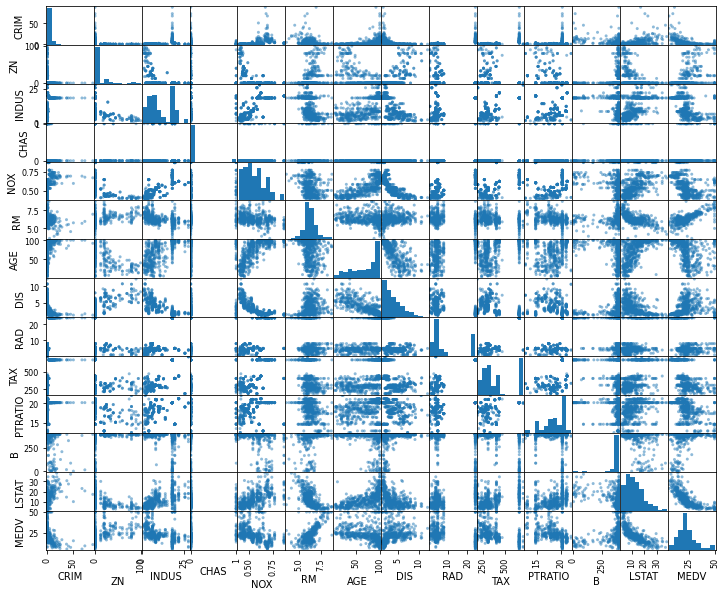

In [75]:
scatter_matrix(dataset.loc[:,:],figsize = (12,10))

In [84]:
cdf = dataset[['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']]
cdf.head(9)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5


In [89]:
x_RM = np.array(dataset[['RM']])
y_MEDV = np.array(dataset[['MEDV']])

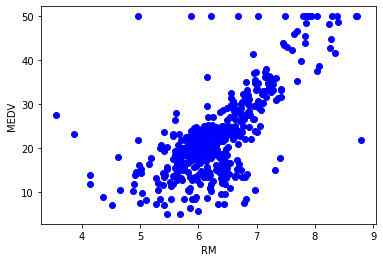

Chose MEDV vs RM because there is a linear relationship


In [94]:
plt.scatter(cdf.RM, cdf.MEDV,  color='blue')
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()
print("Chose MEDV vs RM because there is a linear relationship")

In [97]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_RM, y_MEDV, test_size = 1/3, random_state = 0)

In [118]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [129]:
y_pred_train = regressor.predict(X_train)
y_pred_train
y_pred = regressor.predict(X_test)
y_pred

array([[23.01542952],
       [21.92827233],
       [23.38710719],
       [13.87215875],
       [22.0769434 ],
       [18.37875054],
       [19.03847842],
       [19.62387075],
       [10.37838862],
       [23.68444933],
       [19.52165939],
       [26.02601868],
       [23.08976506],
       [ 7.39567529],
       [36.66529208],
       [29.59412434],
       [22.16986281],
       [31.87994203],
       [24.99461313],
       [18.52742161],
       [23.87958011],
       [18.80617987],
       [21.1012895 ],
       [24.39992886],
       [16.96637539],
       [ 0.06433318],
       [19.59599493],
       [17.21725782],
       [39.14624055],
       [20.77607154],
       [21.64022213],
       [20.67386018],
       [22.02119174],
       [20.80394736],
       [23.78666069],
       [18.09070035],
       [19.80041765],
       [18.75972016],
       [23.15480865],
       [21.42650747],
       [21.1012895 ],
       [17.93273734],
       [21.25925251],
       [14.59693022],
       [24.93886148],
       [23

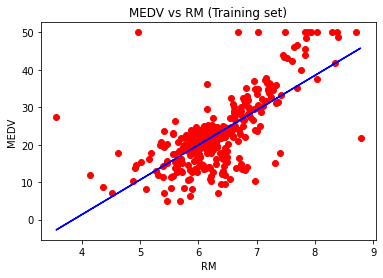

𝛼 =  [-35.83043813]
𝛽 =  [[9.29194184]]
y = [-35.83043813] + [[9.29194184]]X


In [115]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('MEDV vs RM (Training set)')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()
print("𝛼 = ", regressor.intercept_)
print("𝛽 = ", regressor.coef_)
print("y = {} + {}X".format(regressor.intercept_,regressor.coef_))

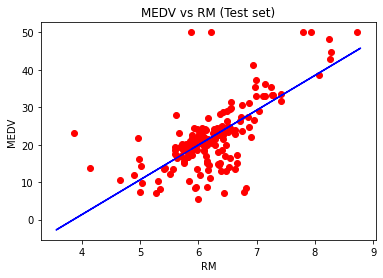

𝛼 =  [-35.83043813]
𝛽 =  [[9.29194184]]
y = [-35.83043813] + [[9.29194184]]X


In [114]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('MEDV vs RM (Test set)')
plt.xlabel('RM')
plt.ylabel('MEDV')
plt.show()
print("𝛼 = ", regressor.intercept_)
print("𝛽 = ", regressor.coef_)
print("y = {} + {}X".format(regressor.intercept_,regressor.coef_))

In [135]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Training Data:")
print('Mean squared error: %.2f'
      % mean_squared_error(y_train, y_pred_train))
# The coefficient of determination: 1 is perfect prediction
print('R2, Coefficient of determination: %.2f'
      % r2_score(y_train,y_pred_train))

Training Data:
Mean squared error: 43.37
R2, Coefficient of determination: 0.50


In [136]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Test Data:")
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('R2, Coefficient of determination: %.2f'
      % r2_score(y_test,y_pred))

Test Data:
Mean squared error: 44.11
R2, Coefficient of determination: 0.45


In [137]:
print("It is overfitting because the MSE and the Coefficient of determination are similar")

It is overfitting because the MSE and the Coefficient of determination are similar
